# 2.3 Circuit Operations - Non-unitary operations

In quantum computing, circuits are composed of quantum gates that operate on qubits, the fundamental units of quantum information. While many quantum gates are unitary operations that preserve the normalization of the quantum state, there are also non-unitary operations that can modify the state in a non-reversible manner. These non-unitary operations play important roles in quantum algorithms, error correction, and specialized computations.

In this section, we will explore non-unitary operations in quantum circuits, focusing on their characteristics, applications, and mathematical representations.

Non-unitary operations can be classified into various categories based on their functionality and purpose. Some common examples include:

1. Measurements: Measurements are non-unitary operations that extract classical information from a quantum state. They collapse the quantum state into one of the possible measurement outcomes, destroying the superposition. Measurements provide classical data that can be used for decision-making or further processing in quantum algorithms.

2. Conditional Operations: Conditional operations allow for the execution of specific quantum gates or measurements based on classical information. These operations enable branching and control flow in quantum circuits, providing conditional logic similar to classical programming. By utilizing the values stored in classical bits, conditional operations alter the quantum state or choose different paths in the quantum computation.

3. Initialization: Initialization operations prepare qubits in desired quantum states. While some initializations are achieved through unitary operations, certain cases require non-unitary operations to create specific states. For example, arbitrary initialization can be performed by specifying the desired state vector and using non-unitary operations to set the qubits accordingly.

Non-unitary operations introduce irreversibility and modify the quantum state in ways that unitary operations alone cannot. They are essential for extracting classical information, introducing conditional logic, and preparing specialized quantum states. Understanding non-unitary operations expands the capabilities of quantum circuits, enabling the implementation of complex quantum algorithms and facilitating quantum error correction techniques.

In the upcoming sections, we will delve into specific non-unitary operations, their properties, and their applications in quantum computing. We will explore measurements, conditional operations, and initialization in more detail, providing insights into their mathematical foundations and practical significance in the quantum computing landscape.

In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import math as mt

from math import pi
from IPython.display import display, Markdown

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

from qiskit.quantum_info import Statevector

backend = BasicAer.get_backend('unitary_simulator')

## 2.1 Measurements

In quantum computing, measurements play a crucial role in extracting information from quantum systems. They allow us to obtain classical information about the state of qubits. Measurements are performed at the end of a quantum computation or during intermediate steps to observe the quantum state.

To understand measurements, it's important to note that quantum states are represented by superpositions, where qubits can exist in multiple states simultaneously. However, when a measurement is made, the quantum state collapses into one of the possible measurement outcomes. The measurement outcome is probabilistic, and the probability of obtaining a specific outcome is determined by the amplitudes of the corresponding state.

A measurement in quantum computing can be represented by an observable operator, denoted as $\hat{M}$. This operator corresponds to the measurement basis and determines the possible measurement outcomes. When a measurement is made, the observable operator projects the quantum state onto one of its eigenstates, yielding a classical outcome.

The outcome of a measurement is obtained as a result of the inner product between the quantum state and the eigenstates of the observable operator. Mathematically, this can be expressed as:

$$
P(m) = |\langle m | \psi \rangle|^2
$$

where $P(m)$ is the probability of obtaining the measurement outcome $m$, $|\langle m | \psi \rangle|^2$ represents the squared magnitude of the inner product between the measurement outcome state $|m\rangle$ and the quantum state $|\psi\rangle$.

Common measurement operators include the Pauli matrices ($\hat{X}$, $\hat{Y}$, $\hat{Z}$), which correspond to measuring in the computational basis. For example, measuring in the computational basis using the Pauli matrix $\hat{Z}$ gives the measurement outcomes 0 and 1.

It's important to note that measurements are non-unitary operations, meaning they irreversibly alter the quantum state. After a measurement, the quantum state collapses into one of the measurement outcomes, and any subsequent operations will depend on the obtained measurement result.

Measurements are a fundamental aspect of quantum computing and are essential for extracting classical information from quantum systems. They allow us to observe and analyze the behavior of qubits, providing valuable insights into the quantum computation process.

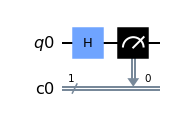

In [3]:
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

# Design
qc.h(qb)
qc.measure(qb, cb)


# Visualization
display(qc.draw('mpl')) 

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 520, '0': 504}

## 2.2 Reset

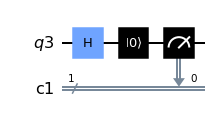

In [5]:
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

# Design
qc.h(qb)
qc.reset(qb[0])
qc.measure(qb, cb)


# Visualization
display(qc.draw('mpl')) 

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

## 2.3 Conditional Operations

Conditional operations in quantum computing allow for the execution of certain quantum gates or measurements based on the classical state of the classical bits. These conditional operations enable the implementation of quantum algorithms with control flow, making quantum computations more flexible and powerful.

One common example of a conditional operation involves applying a quantum gate or measurement to a qubit only if a specific classical condition is met. This condition is determined by the value stored in a classical bit. If the classical condition is satisfied, the quantum operation is performed; otherwise, it is skipped.

### First Example

Let's consider a quantum circuit that uses a conditional operation. In this example, we have one quantum bit (`qb`) and one classical bit (`cb`). The circuit is defined as follows:

```python
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

# Design
qc.x(qb[0]).c_if(cb, 0)
qc.measure(qb, cb)
```

In this circuit, we first apply an X gate (bit-flip) to the quantum bit (`qb[0]`). However, the X gate is conditionally applied based on the value stored in the classical bit (`cb`). The condition `c_if(cb, 0)` specifies that the X gate is applied to `qb[0]` only if the value of `cb` is 0.

After the conditional operation, we perform a measurement of the quantum bit (`qb`) and store the measurement result in the classical bit (`cb`).

The visualization of the circuit can be seen below:

```python
display(qc.draw('mpl'))
```

The diagram provides a graphical representation of the circuit, illustrating the sequence of gates and measurements applied to the quantum and classical bits. It helps in understanding the structure and flow of the circuit.

Conditional operations are crucial for implementing quantum algorithms that involve branching or decision-making based on classical information. They enhance the computational capabilities of quantum circuits, enabling more sophisticated and adaptive quantum computations.

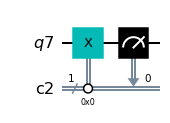

In [7]:
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

# Design
qc.x(qb[0]).c_if(cb, 0)
qc.measure(qb,cb)

# Visualization
display(qc.draw('mpl')) 

In [8]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

### Second Example

Here's another example of a quantum circuit that utilizes conditional operations. The circuit is defined as follows:

```python
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

qc.h(qb)
qc.measure(qb, cb)
qc.x(qb[0]).c_if(cb, 0)
qc.measure(qb, cb)
```

In this circuit, we have one quantum bit (`qb`) and one classical bit (`cb`). The circuit consists of the following operations:

1. Hadamard Gate: The Hadamard gate (`qc.h(qb)`) is applied to the quantum bit `qb`. It puts the qubit into a superposition state.

2. Measurement: We perform a measurement of the quantum bit `qb` and store the result in the classical bit `cb` using `qc.measure(qb, cb)`.

3. Conditional X Gate: The X gate (`qc.x(qb[0])`) is conditionally applied to `qb[0]` based on the value stored in the classical bit `cb`. The condition `c_if(cb, 0)` specifies that the X gate is applied only if the value of `cb` is 0.

4. Second Measurement: Another measurement of the quantum bit `qb` is performed, and the result is stored in the classical bit `cb` using `qc.measure(qb, cb)`.

The visualization of the circuit can be seen below:

```python
display(qc.draw('mpl'))
```

The diagram provides a visual representation of the circuit, illustrating the sequence of gates and measurements applied to the quantum and classical bits. It helps in understanding the structure and flow of the circuit.

This example demonstrates how conditional operations can be used to alter the quantum state or perform different operations based on the measurement outcomes stored in classical bits. Conditional operations enable conditional branching and control flow in quantum circuits, allowing for more versatile quantum computations.

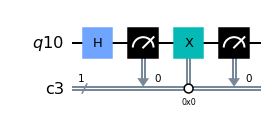

In [9]:
qb = QuantumRegister(1)    # Quantum bits
cb = ClassicalRegister(1)  # Classical bits

qc = QuantumCircuit(qb, cb)

qc.h(qb)
qc.measure(qb,cb)
qc.x(qb[0]).c_if(cb, 0)
qc.measure(qb,cb)

# Visualization
display(qc.draw('mpl')) 

In [10]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'1': 1024}

## 2.3 Arbitrary Initialization

Arbitrary initialization is a technique in quantum computing that allows us to prepare a quantum state with a desired vector. This means we can initialize the qubits in a superposition or any other specific state that we choose. The `initialize` method in quantum circuits is used to achieve this.

In the following example, we will initialize a 2-qubit system with a desired vector using the `initialize` method.

In this code snippet, `desired_vector` represents the desired state vector we want to initialize the qubits with. It contains the amplitudes for the basis states of the 2-qubit system. Here, we have chosen a state with equal amplitudes for two specific superposition states.

The `QuantumRegister` object `qb` is created with 2 qubits to match the desired state vector. Then, a `QuantumCircuit` object `qc` is initialized with the quantum register.

The `initialize` method is called on the quantum circuit `qc` and takes two arguments: the desired state vector `desired_vector` and a list of qubits `[qb[0], qb[1]]` that we want to initialize with the desired state.

After calling the `initialize` method, the quantum circuit is prepared with the desired initial state.

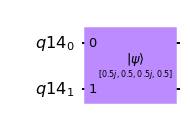

In [11]:
desired_vector = [
    1 / mt.sqrt(4) * complex(0, 1),
    1 / mt.sqrt(4) * complex(1, 0),
    1 / mt.sqrt(4) * complex(0, 1),
    1 / mt.sqrt(4) * complex(1, 0)]

qb = QuantumRegister(2)

qc = QuantumCircuit(qb)

qc.initialize(desired_vector, [qb[0], qb[1]])

# Visualization
display(qc.draw('mpl')) 

In [12]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
display(qc_state)

array([3.061617e-17+5.00000000e-01j, 5.000000e-01+1.11022302e-16j,
       3.061617e-17+5.00000000e-01j, 5.000000e-01+1.11022302e-16j])